Done


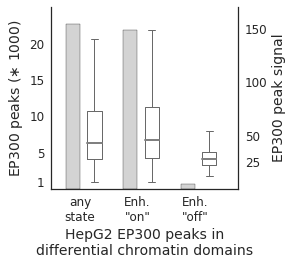

In [1]:
%matplotlib inline

import os as os
import collections as col
import itertools as itt
import pickle as pck
import json as js
import time as ti

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import numpy.random as rng
import scipy.stats as stats
import pandas as pd
import seaborn as sns

# What does this do?
# Plot simple box and barplot
# illustrating that switching
# enhancers do overlap with EP300
# peaks

date = '20180922'

run_p300_enh_switch = True

save_figures = True
diss_version = True

sns.set(style='white',
        font_scale=1.5,
        rc={'font.family': ['sans-serif'],
            'font.sans-serif': ['DejaVu Sans']})

np.seterr('raise')

journal = 'bmc_genbio'
res = 'print_lo'
fig_sizes = js.load(open('/home/pebert/work/code/mpggit/statediff/annotation/misc/fig_sizes.json'))
fig_sizes = fig_sizes[journal]
resolution = fig_sizes['resolution']

fhgfs_base = '/TL/deep/fhgfs/projects/pebert/thesis/projects/statediff'
usecase_dir = os.path.join(fhgfs_base, 'usecases/uc1_p300')

cache_dir = os.path.join(fhgfs_base, 'caching/notebooks')

data_root = os.path.join(fhgfs_base, 'sciddo', 'deep')

base_out = '/TL/deep-external01/nobackup/pebert/cloudshare/mpiinf/phd/chapter_projects/statediff'
fig_supp = os.path.join(base_out, 'figures', 'pub', 'supp')
fig_main = os.path.join(base_out, 'figures', 'pub', 'main')
fig_collect = os.path.join(base_out, 'figures', 'pub', 'collection')
fig_diss = '/home/pebert/work/code/mpggit/dissertation/Figures/diffchrom'


def plot_enh_switching(hsp_peaks, onoff_peaks, offon_peaks, save_diss):
    """
    """    
    fig, ax = plt.subplots(figsize=fig_sizes['one_col']['square'])
    
    boxcolor = 'dimgrey'
    medcolor = 'grey'
    median_props = {'color': medcolor, 'linewidth': 2}
    box_props = {'color': boxcolor, 'linewidth': 1}
    whisker_props = {'color': boxcolor, 'linewidth': 1}
    cap_props = {'color': boxcolor, 'linewidth': 1}
    
    ax.set_xlim(0, 7)
    ax.set_ylim(-5, 25000)
    
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_yticks([1000, 5000, 10000, 15000, 20000])
    ax.set_yticklabels(['1', '5', '10', '15', '20'], fontsize=12)
    ax.set_ylabel(r'EP300 peaks ($\ast$ 1000)', fontsize=14)
    ax.set_xticks([1.5, 3.5, 5.5])
    ax.set_xticklabels(['any\nstate', 'Enh.\n"on"', 'Enh.\n"off"'], fontsize=12)
    ax.set_xlabel('HepG2 EP300 peaks in\ndifferential chromatin domains', fontsize=14)
    
    if not save_diss:
        tt = ax.set_title('11', fontsize=16)
        tt.set_position((0.025, 1.01))
    
    xpos_bars = [1, 3, 5]
    bar_ht = [hsp_peaks.shape[0], onoff_peaks.shape[0], offon_peaks.shape[0]]
    bars = ax.bar(xpos_bars, bar_ht, align='edge',
                  color='lightgrey', edgecolor='black',
                  width=0.5)
    
    yr = ax.twinx()
    yr.set_ylim(0, 170)
    xpos_box = [2, 4, 6]
    bar_vals = [hsp_peaks['signal'], onoff_peaks['signal'], offon_peaks['signal']]
    boxes = yr.boxplot(bar_vals, positions=xpos_box, sym="", labels=None,
                       medianprops=median_props, boxprops=box_props,
                       whiskerprops=whisker_props, capprops=cap_props)
    yr.set_xlim(0.5, 7)
    yr.set_yticks([25, 50, 100, 150])
    yr.set_yticklabels(['25', '50', '100', '150'], fontsize=12)
    yr.set_ylabel('EP300 peak signal', fontsize=14)
    
    yr.spines['top'].set_visible(False)
    yr.spines['left'].set_visible(False)
    
    yr.set_xticks([1.5, 3.5, 5.5])
    yr.set_xticklabels(['any\nstate', 'Enh.\n"on"', 'Enh.\n"off"'], fontsize=6)
    
    return fig, []

if run_p300_enh_switch:
    
    header = ['chrom', 'start', 'end', 'length', 'signal', 'pv', 'qv', 'summit']
    
    hsp_ds = os.path.join(usecase_dir, 'uc1_cmm18_penem_HG_vs_Mo_p300_hsp.bed')
    onoff_ds = os.path.join(usecase_dir, 'uc1_cmm18_penem_HG_vs_Mo_enh-on-off_p300.bed')
    offon_ds = os.path.join(usecase_dir, 'uc1_cmm18_penem_HG_vs_Mo_enh-off-on_p300.bed')
    
    hsp_df = pd.read_csv(hsp_ds, sep='\t', header=None, names=header)
    onoff_df = pd.read_csv(onoff_ds, sep='\t', header=None, names=header)
    offon_df = pd.read_csv(offon_ds, sep='\t', header=None, names=header)
    
    fig, exart = plot_enh_switching(hsp_df, onoff_df, offon_df, diss_version)
    
    if save_figures:
        outname = 'fig_11_chromdyn_enh_p300'
        if diss_version:
            out_folder = fig_diss
        else:
            out_folder = fig_main
        
        out_pdf = os.path.join(out_folder, outname + '.pdf')
        fig.savefig(out_pdf, bbox_inches='tight', extra_artists=exart)

        if not diss_version:
            out_png = os.path.join(out_folder, outname + '.png')
            fig.savefig(out_png, bbox_inches='tight', extra_artists=exart, dpi=resolution[res])
    
    print('Done')